# Importing Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.ensemble import RandomForestClassifier

There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

# Reading the data

In [2]:
df = pd.read_csv("archive/UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data Description

In [4]:
df.shape

(30000, 25)

Data's shape is 25 features and 30,000 records.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Data frame has floating and Integer datatype.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# EDA

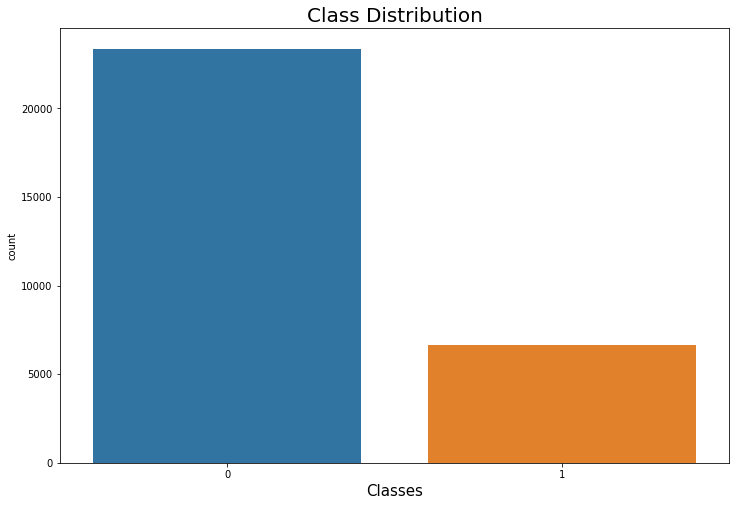

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(df['default.payment.next.month'])
plt.title("Class Distribution",fontsize=20)
plt.xlabel("Classes",fontsize=15)
plt.show()

The Class variable is Imbalanced so we will treat the balancing by using different methods, under sampling, over sampling and SMOTE etc.

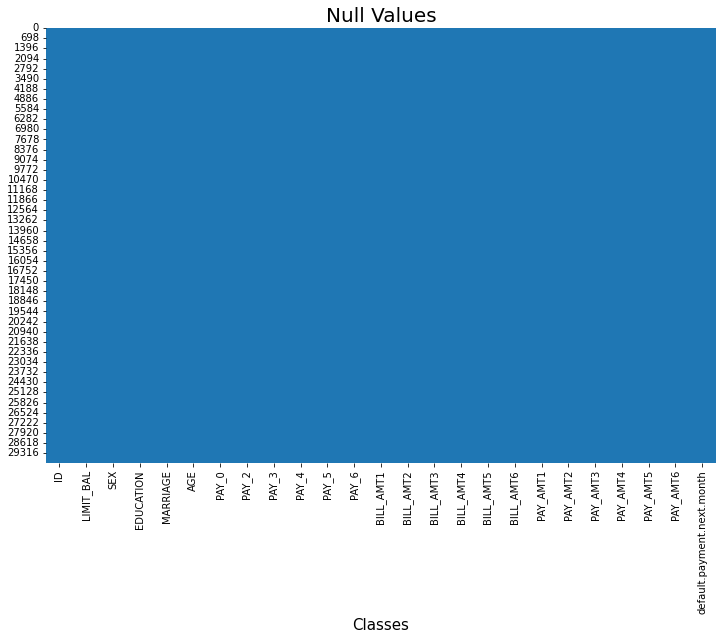

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(),cbar=False,cmap='tab20')
plt.title("Null Values",fontsize=20)
plt.xlabel("Classes",fontsize=15)
plt.show()

There is No Na Values in the DataFrame.

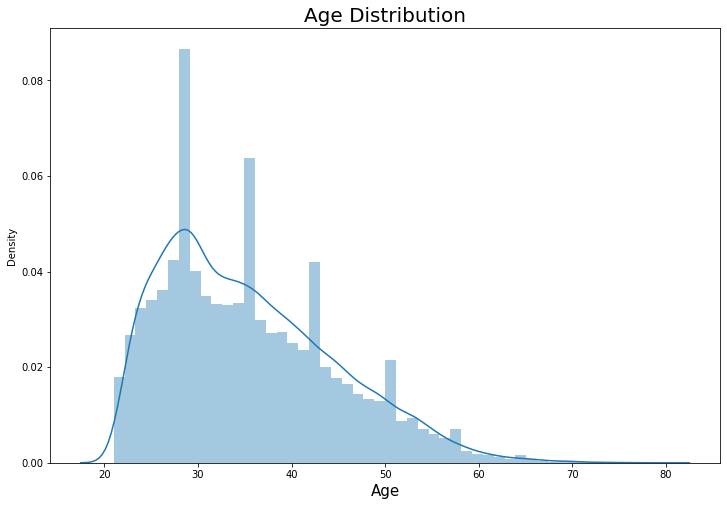

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(df.AGE)
plt.title("Age Distribution",fontsize = 20)
plt.xlabel("Age",fontsize = 15)


plt.show()

The data is right skewed here median is less than the mean or median is the left side of mean.
where as data is most concentrated in the age of 20 to 40 years age.

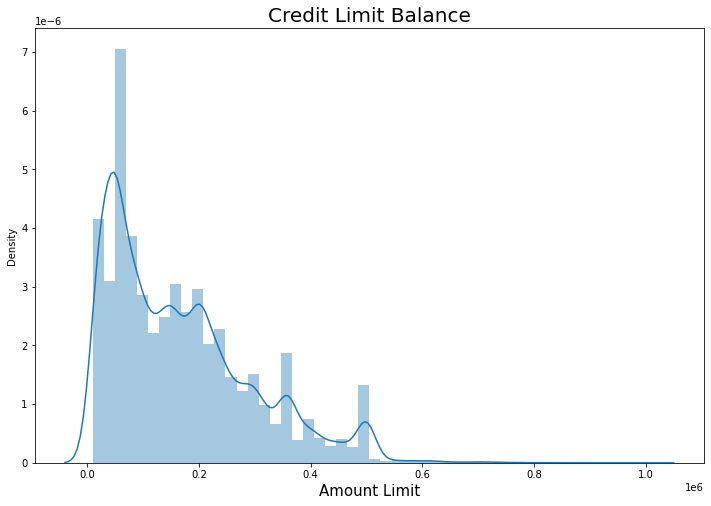

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df.LIMIT_BAL)
plt.title("Credit Limit Balance",fontsize = 20)
plt.xlabel("Amount Limit",fontsize = 15)


plt.show()

Credit available amount is not normally distributed whereas the mean is greater than the median.

We don't need ID column to make predictions so we will drop ID.

# Splitting the Data

In [11]:
X = df.drop(['ID','default.payment.next.month'],axis=1)
y = df['default.payment.next.month']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

Splitting data into training and testing.

# Model 1 with all the features.

In [16]:
rf_1 = RandomForestClassifier()

In [17]:
rf_1.fit(X_train,y_train)

RandomForestClassifier()

model fit on whole dataset without feature selection.

In [18]:
y_pred = rf_1.predict(X_test)

In [19]:
print("Training Score for Random Forest: ", rf_1.score(X_train,y_train))
print("Testing Score for Random Forest: ", accuracy_score(y_test,y_pred))

Training Score for Random Forest:  0.9995024875621891
Testing Score for Random Forest:  0.814949494949495


Here we have very high training accuracy which shows the higher overfitting for the dataset.

## Classification Report

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.63      0.36      0.46      2158

    accuracy                           0.81      9900
   macro avg       0.74      0.65      0.67      9900
weighted avg       0.80      0.81      0.80      9900



Precision for 0 class is 84 where as for 1 class is 64 due to the imbalancing of target variable.
where as the weighted average of Precision is .80 for testing.

In [21]:
class_names = ['Default_Payment','Non_Default_Payment']

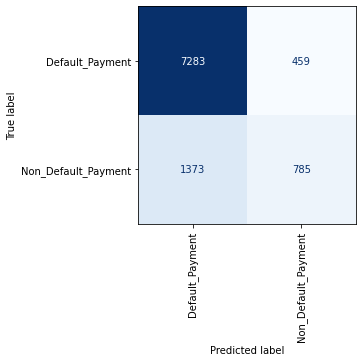

In [22]:
disp = plot_confusion_matrix(rf_1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,xticks_rotation='vertical',colorbar=False)
plt.show()

Here Type-I Error is higher than the True Negative which leads to the model not good fit.

## Hyper Parameter Tunning.

In [23]:
rf_model = RandomForestClassifier()

In [24]:
parameters = {'n_estimators':[60,70,80],'max_depth':[1,2,3,4,5,6],'min_samples_split':[3,4,5,6,7],
              'min_samples_leaf':[1,2,3,4,5,6]}

In [25]:
clf = GridSearchCV(rf_model, parameters,cv=5)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_
#     {'max_depth': 5,
#      'min_samples_leaf': 4,
#      'min_samples_split': 3,
#      'n_estimators': 70}

In [ ]:
rf_2 = clf.best_estimator_

In [ ]:
rf_2.fit(X_train,y_train)

In [ ]:
y_pred = rf_2.predict(X_test)

In [ ]:
rf_2.score(X_train,y_train)

In [ ]:
rf_2.score(X_test,y_test)

In [ ]:
disp = plot_confusion_matrix(rf_2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,xticks_rotation='vertical',colorbar=False)
plt.show()

## Importance Features

In [ ]:
# view the feature scores

feature_scores = pd.Series(rf_1.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

In [ ]:
# Creating a seaborn bar plot

plt.figure(figsize=(18,9))
sns.barplot(x=feature_scores, y=feature_scores.index,color='darkcyan')

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

## Feature Selection and Modelling

In [ ]:
X = df[feature_scores.index[:15]]
y = df['default.payment.next.month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
rf_3 = RandomForestClassifier()

In [ ]:
rf_3.fit(X_train,y_train)

In [ ]:
y_pred = rf_3.predict(X_test)

In [ ]:
print("Training Score for Random Forest: ", rf_3.score(X_train,y_train))
print("Testing Score for Random Forest: ", accuracy_score(y_test,y_pred))

## Classification Report

In [ ]:
print(classification_report(y_test,y_pred))

Precision for 0 class is 84 where as for 1 class is 64 due to the imbalancing of target variable.

In [ ]:
class_names = ['Default_Payment','Non_Default_Payment']

In [ ]:
disp = plot_confusion_matrix(rf_3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,xticks_rotation='vertical',colorbar=False)
plt.show()

## Hyper Parameter Tunning

In [ ]:
rf_4 = RandomForestClassifier()

In [ ]:
parameters = {'n_estimators':[60,70,80],'max_depth':[1,2,3,4,5,6],'min_samples_split':[3,4,5,6,7],
              'min_samples_leaf':[1,2,3,4,5,6]}

In [ ]:
clf = GridSearchCV(rf_4, parameters,cv=5)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.best_params_

In [ ]:
rf_5 = clf.best_estimator_

In [ ]:
rf_5.fit(X_train,y_train)

In [ ]:
y_pred = rf_5.predict(X_test)

In [ ]:
print("Training Score for Random Forest: ",rf_5.score(X_train,y_train))
print("Testing Score for Random Forest: ",rf_5.score(X_test,y_test))

In [ ]:
disp = plot_confusion_matrix(rf_5, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,xticks_rotation='vertical',colorbar=False)
plt.show()

## Conclusions.

1. The data is highly Imabalanced for target variables, we can try to handle the imbalancing by using methods Under sampling, Over Sampling and SMOTE etc, I tried to apply that but system is not able to install the library imbalance which i reported to Tej pratap sir and Yogesh as well.

2. Balanced Random Forest can also use for to handle the class balance but due to unavailability of library not able to implement that.

3. Inbuilt Class weights are not giving appropriate results here tried using Balanced subsamples but it gives not upto the mark results.

4. Without Tunning model with all the features we are getting around 99% training score and approx 82% testing score.which leads to it in overfitting.
    - After Tunning the model with all the features are leads to control the overfitting of the model where as the training and testing accuracy are almost similar approx to 82%.
    
5. Without Tunning the model with the selected features are quite similar with the all the features model are overfitted with the accuracy of training ~ 99% and testing ~81%.
    - After Tunning the model with selected features are perform same as all the features with the accuracy of Testing and Training approximately similar ~82%.
    
    
6. The Model Perform well with, Handling classes with different methods, might be it will increase the performance of model.